# Groupe 3 : Projet Machine Learning

## Introduction

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import nltk

In [27]:
dataset = pd.read_csv('scitweets_export.tsv', sep='\t')
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


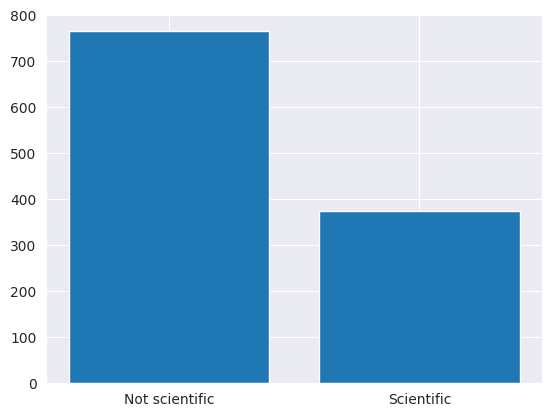

In [28]:
not_scientific = dataset.where(dataset['science_related'] == 0)
scientific = dataset.where(dataset['science_related'] == 1)

fig, ax = plt.subplots()
ax.bar(['Not scientific', 'Scientific'], [not_scientific['tweet_id'].count(), scientific['tweet_id'].count()])
plt.show()

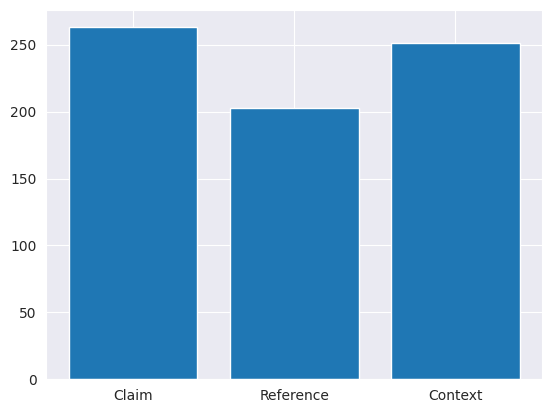

In [29]:
fig, ax = plt.subplots()
ax.bar(['Claim', "Reference", "Context"],
       [scientific.where(scientific['scientific_claim'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_reference'] == 1)['tweet_id'].count(),
        scientific.where(scientific['scientific_context'] == 1)['tweet_id'].count()])
plt.show()

## Prétraitement

On met tout en minuscule

In [36]:
dataset['text'] = dataset['text'].apply(lambda x: x.lower())
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore guess that s sign recent tread...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald s breakfast stop gym basketball fle...,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch lock highs lead sleeping couch gotta st...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


### Lemmatization

download the packages

In [31]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /home/raphael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/raphael/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/raphael/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/raphael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Remove the stopwords but not the negation words or the words that are important for the sentiment analysis

In [32]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
work_to_keep = ['no', 'not', 'nor', 'too', 'very', 'against', 'but', 'don', 'don\'t', 'ain', 'aren', 'aren\'t', 'couldn', 'couldn\'t', 'didn', 'didn\'t', 'doesn', 'doesn\'t', 'hadn', 'hadn\'t', 'hasn', 'hasn\'t', 'haven', 'haven\'t', 'isn', 'isn\'t', 'mightn', 'mightn\'t', 'mustn', 'mustn\'t', 'needn', 'needn\'t', 'shan', 'shan\'t', 'shouldn', 'shouldn\'t', 'wasn', 'wasn\'t', 'weren', 'weren\'t', 'won', 'won\'t', 'wouldn', 'wouldn\'t']

for word in work_to_keep:
    stop_words.remove(word)

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald's breakfast stop gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove the links

In [33]:
for index, line in dataset.iterrows():
    splitted = line['text'].split(' ')
    new_text = []
    for word in splitted:
        if 'http' in word or 'www' in word:
            continue
        new_text.append(word)
    dataset.at[index, 'text'] = ' '.join(new_text)

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald's breakfast stop gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Transform the emojis into text

In [34]:
import emoji

# Parcourir les indices et modifier directement les valeurs dans le DataFrame
for index, line in dataset.iterrows():
    dataset.at[index, 'text'] = emoji.demojize(line['text'])

# Afficher les premières lignes du DataFrame pour vérifier les modifications
dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore. guess that's sign recent tread...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald's breakfast stop gym :basketball::fle...,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch-lock highs lead sleeping couch. gotta st...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove the non-alphabetic characters except the #

In [35]:
for index, line in dataset.iterrows():
    splitted = line['text'].split(' ')
    new_text = []
    for word in splitted:
        new_word = ""
        for l in word:
            if l.isalpha() or l == '#':
                new_word += l
            else:
                new_word += ' '
        new_text.append(new_word)
    print(' '.join(new_text))
    dataset.at[index, 'text'] = ' '.join(new_text)

dataset.head()

knees bit sore  guess that s sign recent treadmilling working
mcdonald s breakfast stop gym  basketball  flexed biceps 
gynecologist cancer experience explain dangers transvaginal douching fluoride toxins dioxin  #pdx
couch lock highs lead sleeping couch  gotta stop shit 
daily routine help prevent problems bipolar disorder
impact infertility relationship
 traffic jam  brain s neurons could cause statin related cognitive decline
playing games improve lives save world   chris pelle via  postarcade #cda  
effect climate change iceberg production greenland glaciers
 hankazaria  thesimpsons oh loneliness cheeseburgers dangerous mix
#bbcsportsday honestly think liverpool left back right wing away cl  fabio coentrao james rodriguez 
 bpkelly   damn book lady decides stop fuckin retard ill   days
science sucks 
pay attention classification essays format
 repcohen  senalexander  senbobcorker pls support #nih funding help fight #pancreaticcancer  pancan  pancanmemphis #ifight mydad
poverty grea

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore guess that s sign recent tread...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald s breakfast stop gym basketball fle...,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch lock highs lead sleeping couch gotta st...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


Remove multiple spaces

In [37]:
for index, line in dataset.iterrows():
    dataset.at[index, 'text'] = ' '.join(line['text'].split())

dataset.head()

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knees bit sore guess that s sign recent treadm...,0,0.0,0.0,0.0
1,1,319090866545385472,mcdonald s breakfast stop gym basketball flexe...,0,0.0,0.0,0.0
2,2,322030931022065664,gynecologist cancer experience explain dangers...,1,1.0,0.0,0.0
3,3,322694830620807168,couch lock highs lead sleeping couch gotta sto...,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problems bipolar di...,1,1.0,0.0,0.0


## Vectorisation des textes

(TF-IDF)

## Choix des modèles